In [56]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import os
from pathlib import Path

%matplotlib inline

In [57]:
# Reading Data

clothing_Access_path = Path("../data/rawdata/Clothing_ Access _Stores_Total.csv")
department_Stores_path = Path("../data/rawdata/Department_Stores_Total.csv")
electronics_Appli_path = Path("../data/rawdata/Electronics_Appli_Stores_Total.csv")
Food_Serv_Drink_path = Path("../data/rawdata/Food _Serv_ Drink _Places_Total.csv")
Food_Beverage_path = Path("../data/rawdata/Food_Beverage_Stores_Total.csv")
Furniture_HomeFurnis_path = Path("../data/rawdata/Furnitures_HomeFurnis_Total.csv")
Health_Personal_Care_path = Path("../data/rawdata/Health_Personal_Care_Total.csv")
Nonstore_Retailers_path = Path("../data/rawdata/Nonstore _Retailers_Total.csv")

clothing_Access = pd.read_csv(clothing_Access_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
department_Stores = pd.read_csv(department_Stores_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
electronics_Appli = pd.read_csv(electronics_Appli_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
food_Serv_Drink = pd.read_csv(Food_Serv_Drink_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
food_Beverage = pd.read_csv(Food_Beverage_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
furniture_HomeFurnis = pd.read_csv(Furniture_HomeFurnis_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
health_Personal_Care = pd.read_csv(Health_Personal_Care_path, index_col="Period", infer_datetime_format=True, parse_dates=True)
nonstore_Retailers = pd.read_csv(Nonstore_Retailers_path, index_col="Period", infer_datetime_format=True, parse_dates=True)

In [84]:
retail_combined_df = pd.concat([clothing_Access, department_Stores, electronics_Appli, food_Serv_Drink, food_Beverage, furniture_HomeFurnis, health_Personal_Care], axis="columns", join="inner")
combined_df.head()

,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
Period,,,,,,,
18-Jan,15780.0,9120.0,7290.0,54478.0,60393.0,8878.0,27699.0
18-Feb,18424.0,9663.0,6972.0,54702.0,56483.0,8701.0,25667.0
18-Mar,22207.0,11481.0,7581.0,63389.0,63791.0,10185.0,28477.0
18-Apr,20463.0,10567.0,6835.0,60128.0,59571.0,9365.0,27155.0
18-May,23560.0,12014.0,7397.0,63941.0,64527.0,10114.0,28960.0


In [85]:
retail_combined_df.columns=["clothing", "department_Stores","electronics_Appli", "food_Serv_Drink", "food_Beverage", "furniture_HomeFurnis", "health_Personal_Care"]

In [86]:
retail_combined_df.head()

,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
Period,,,,,,,
18-Jan,15780.0,9120.0,7290.0,54478.0,60393.0,8878.0,27699.0
18-Feb,18424.0,9663.0,6972.0,54702.0,56483.0,8701.0,25667.0
18-Mar,22207.0,11481.0,7581.0,63389.0,63791.0,10185.0,28477.0
18-Apr,20463.0,10567.0,6835.0,60128.0,59571.0,9365.0,27155.0
18-May,23560.0,12014.0,7397.0,63941.0,64527.0,10114.0,28960.0


In [87]:
retail_combined_df.isnull().sum()

clothing                9
department_Stores       9
electronics_Appli       9
food_Serv_Drink         9
food_Beverage           9
furniture_HomeFurnis    9
health_Personal_Care    9
dtype: int64

In [88]:
retail_combined_df.dropna(inplace = True)
retail_combined_df.head()

,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
Period,,,,,,,
18-Jan,15780.0,9120.0,7290.0,54478.0,60393.0,8878.0,27699.0
18-Feb,18424.0,9663.0,6972.0,54702.0,56483.0,8701.0,25667.0
18-Mar,22207.0,11481.0,7581.0,63389.0,63791.0,10185.0,28477.0
18-Apr,20463.0,10567.0,6835.0,60128.0,59571.0,9365.0,27155.0
18-May,23560.0,12014.0,7397.0,63941.0,64527.0,10114.0,28960.0


In [97]:
retail_combined_df.to_csv('../data/cleandata/retail_combined_df.cvs')

In [89]:
retail_combined_df.mean()

clothing                20395.512821
department_Stores       10695.256410
electronics_Appli        7236.153846
food_Serv_Drink         58846.333333
food_Beverage           66642.948718
furniture_HomeFurnis     9952.897436
health_Personal_Care    28697.153846
dtype: float64

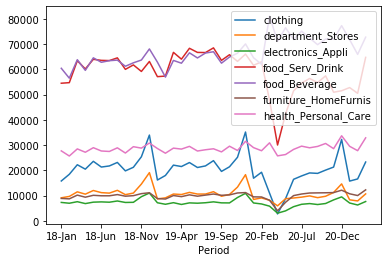

In [90]:
retail_combined_df.plot()

In [91]:
retail_combined_df.std()

clothing                5874.087445
department_Stores       2538.141070
electronics_Appli       1460.944189
food_Serv_Drink         7834.479469
food_Beverage           5598.277202
furniture_HomeFurnis    1401.226902
health_Personal_Care    1702.054974
dtype: float64

In [94]:
rolling_combined_df = combined_df.rolling(window=21).std()
rolling_combined_df.dropna(inplace = True)
rolling_combined_df.head()

,clothing,department_Stores,electronics_Appli,food_Serv_Drink,food_Beverage,furniture_HomeFurnis,health_Personal_Care
Period,,,,,,,
19-Sep,3719.477986,2207.410714,1008.067819,4117.498615,2949.047896,674.802017,1128.429568
19-Oct,3472.745506,2164.337464,1010.888268,3749.839027,2914.328044,640.819936,1162.076997
19-Nov,3448.867111,2180.169365,1073.090350,3239.046099,2553.638925,619.406029,1006.550271
19-Dec,4459.393570,2645.314489,1291.778792,3290.385650,2908.374178,667.988209,1215.904954
20-Jan,4620.153313,2729.395821,1284.237283,3231.616151,2731.071298,661.751759,1179.796407


In [ ]:
.rolling(window=21).std()